<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/Proyecto_IPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Proyecto 2 Series de tiempo**

Michelle Gómez

Paula Pelayo

Rogelio Campos

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)





### **ÍNDICE**

- Introducción
- Teoría Modelo (Neural network autoregression)
- Descarga de datos
- Aplicación de transformación matemática
- Ajuste de modelo
- Validación y análisis de resultados
- Elección de modelo para cada acción, según métrica de error
- Pronósticos a 3 meses / cada industria y portafolio total
- Cierre y conclusiones



## **Introducción**

IPC - Índice de Precios y Cotizaciones.


## **Teoría del Modelo**

Neural network autoregression

## **Descarga de Datos**


In [8]:
import pandas as pd
import yfinance as yf

In [46]:
ticker = yf.Tickers(["AMXB.MX",
                     "WALMEX.MX",
                     "FEMSAUBD.MX",
                     "GMEXICOB.MX",
                     "GFNORTEO.MX",
                     "BIMBOA.MX",
                     "TLEVISACPO.MX",
                     "KIMBERA.MX",
                     "CEMEXCPO.MX",
                     "ELEKTRA.MX",
                     "MEGACPO.MX",
                     "LABB.MX",
                     "CUERVO.MX",
                     "GRUMAB.MX",
                     "ALSEA.MX",
                     "GFINBURO.MX",
                     "OMAB.MX",
                     "OMAB.MX",
                     "ASURB.MX",
                     "AC.MX",
                     "GCARSOA1.MX",
                     "BBAJIOO.MX",
                     "GAPB.MX",
                     "BOLSAA.MX",
                     "PINFRA.MX",
                     "ALFAA.MX",
                     "LIVERPOLC-1.MX",
                     "PE&OLES.MX",
                     "KOF.MX",
                     "VOLARA.MX",
                     "VESTA.MX",
                     "GCC.MX",
                     "SITES1A-1.MX",
                     "ORBIA.MX",
                     "Q.MX",
                     "R.A.MX"])


data = ticker.history(start= '2015-01-01', end= '2023-12-31', interval='1mo')['Close']

[*********************100%***********************]  35 of 35 completed
ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['LIVERPOLC-1.MX', 'R.A.MX', 'KOF.MX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [47]:
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)

In [48]:
data.head()

Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,...,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,R.A.MX,SITES1A-1.MX,TLEVISACPO.MX,VESTA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,65.702614,24.691061,37.795330,11.671398,152.225372,NaN,34.200203,15.430020,11.531770,NaN,...,33.039604,262.346039,130.751801,NaN,NaN,NaN,88.730598,23.547867,13.67,23.119331
2015-02-01,70.285492,29.113340,43.193314,11.671398,159.254852,NaN,37.858757,16.780148,13.125945,NaN,...,34.645489,281.710846,138.726166,NaN,NaN,NaN,92.414070,23.328480,15.00,29.220594
2015-03-01,69.477180,27.684193,42.006325,11.124299,159.635437,NaN,38.791317,16.133081,12.536794,NaN,...,31.765974,235.338333,126.094269,NaN,NaN,NaN,91.677376,23.035959,17.09,30.546972
2015-04-01,69.892464,27.998787,43.400566,11.737051,168.668915,NaN,36.944122,18.360481,13.335611,NaN,...,35.035065,230.718781,136.695755,NaN,NaN,NaN,101.554520,23.328480,19.08,29.048088
2015-05-01,70.519691,27.224813,43.626659,11.744345,176.417740,NaN,37.374535,16.991690,12.993213,NaN,...,37.203823,242.054352,130.000076,NaN,NaN,NaN,105.901924,22.910900,18.49,31.003117


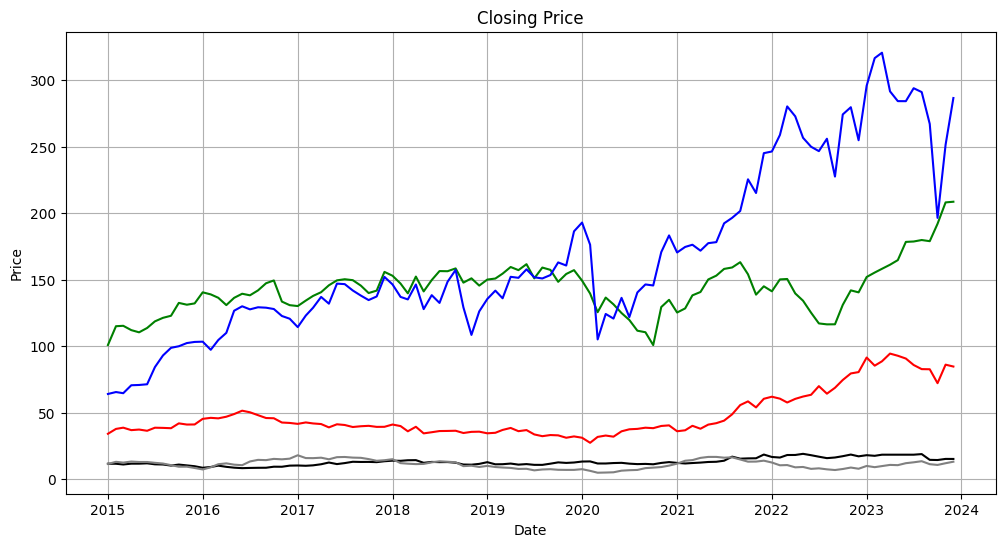

In [60]:
# plot of data

import matplotlib.pyplot as plt

# plot the closing price of 5 random
plt.figure(figsize=(12, 6))
plt.plot(data['AMXB.MX'],label='AMXB.MX', color='black')
plt.plot(data['CEMEXCPO.MX'],label='CEMEXCPO.MX', color='gray')
plt.plot(data['BIMBOA.MX'],label='BIMBOA.MX', color='red')
plt.plot(data['FEMSAUBD.MX'],label='FEMSAUBD.MX', color='green')
plt.plot(data['GAPB.MX'],label='GAPB.MX', color='blue')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()
